# Visualization of Tech Market Data

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# improved visualization
#%config InlineBackend.figure_format = 'svg'

### A look at the Data
This is the first few enteries of the Google market data.

In [2]:
dfGOOG = pd.read_csv('Stocks/goog.us.txt')
dfGOOG.head()

,Date,Time,Open,High,Low,Close,Volume,OpenInt
0,2017-11-17,15:35:00,1034.010,1034.420,1030.000,1032.1650,91733,0
1,2017-11-17,15:40:00,1032.165,1032.390,1029.680,1029.6800,20982,0
2,2017-11-17,15:45:00,1029.780,1032.375,1029.100,1031.9600,29508,0
3,2017-11-17,15:50:00,1031.490,1032.280,1030.740,1030.9650,3516,0
4,2017-11-17,15:55:00,1031.175,1031.175,1030.435,1030.8844,14026,0


### Time Axis

There are two ways of looking at this market data. We can either look at it as if time only exists while the market is open or we can look at it in real time. The following function converts the date and time columns into 'epoch time', which is the number of seconds since January 1, 1970. This will allow us to get a graph in terms of the time we experience.

In [3]:
# Function to take one line and convert year and time to single datetime
def theTime(dataLine):
    dataLine[1]=time.mktime(datetime.strptime(dataLine[0]+' '+dataLine[1], "%Y-%m-%d %H:%M:%S").timetuple())
    dataLine = dataLine[1:]
    return dataLine

def replaceTime(dataFrame):
    return dataFrame.apply(theTime, axis=1)

Now that we have a funcition to put things into real time we will plot the difference between these two graphs.

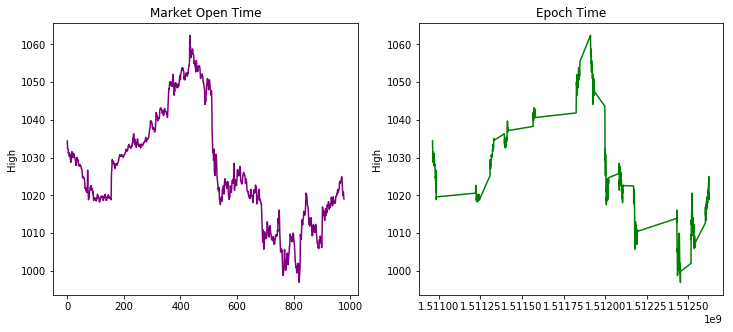

In [4]:
# convert the dataframe into epoch time.
epochGOOG = replaceTime(dfGOOG)

# set figuresize: 10 wide 5 tall
plt.figure(figsize=(12, 5))

# figure = 1x2, this is number 1
plt.subplot(1, 2, 1)
plt.plot(dfGOOG['High'], color='purple')
plt.ylabel('High')
plt.title('Market Open Time')

# figure = 1x2, this is number 2
plt.subplot(1, 2, 2)
plt.plot(epochGOOG['Time'], epochGOOG['High'], color='green')
plt.ylabel('High')
plt.title('Epoch Time')

# show the subplots
plt.show()

As we can see, the Market Open Time graph seems to have a continuous level of volitility, while the Epoch Time graph seems to have long periods of linear stability. This is because the graph is linearly interpolating over the missing data points. A better way to view what is occouring is to show the same two graphs as scatter plots.

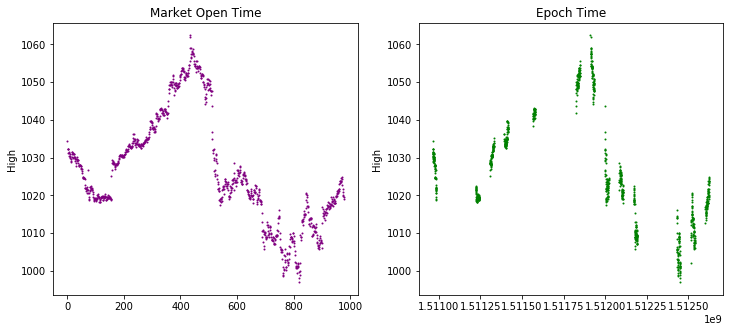

In [5]:
# set figuresize: 10 wide 5 tall
plt.figure(figsize=(12, 5))

# figure = 1x2, this is number 1
plt.subplot(1, 2, 1)
plt.scatter(dfGOOG.index,dfGOOG['High'], color='purple', s=1)
plt.ylabel('High')
plt.title('Market Open Time')

# figure = 1x2, this is number 2
plt.subplot(1, 2, 2)
plt.scatter(epochGOOG['Time'], epochGOOG['High'], color='green', s=1)
plt.ylabel('High')
plt.title('Epoch Time')

# show the subplots
plt.show()

Now we can see why there is such a difference in the two graphs even though they are plotting the same information. The large x axis gaps on the Epoch Time graph are times when the market is closed and not trading (at least in this dataset, pre/after market hours may not be captured here). One other intresting not about the Epoch Time graph is that threre are actually two different large x axis gap sizes. The smaller of the gaps between days are just that, days, because the markets close at night. There are larger gaps in the data that represent weekends, when the market is also closed. <br/> For the purpose of the rest of this exercise we will be using the regular, market open time, because it is not really important and it looks better.

### Open High & Low
Next we will look at each of the four tech companies open, high, and low for each of the 5 min incements over the time period represented here. <br/> First lets import all of the data files.


In [6]:
Google = pd.read_csv('Stocks/goog.us.txt')
Apple = pd.read_csv('Stocks/aapl.us.txt')
Intel = pd.read_csv('Stocks/intc.us.txt')
Amazon = pd.read_csv('Stocks/amzn.us.txt')

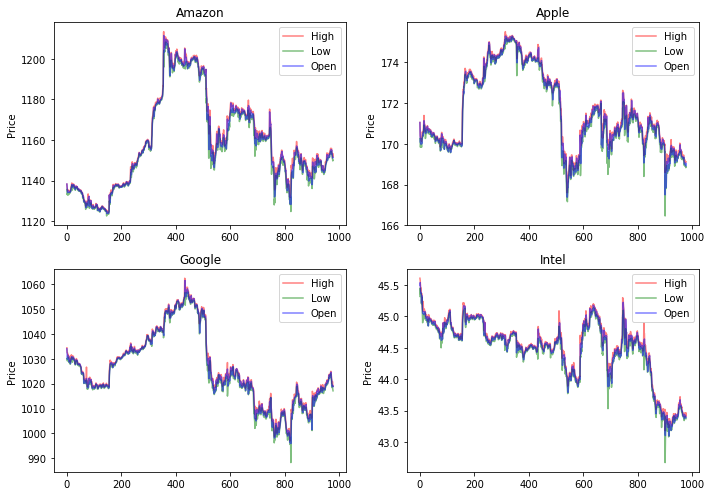

In [7]:
# set figuresize: 10 wide 5 tall
plt.figure(figsize=(10, 7))


# Amazon
plt.subplot(2, 2, 1)
plt.plot(Amazon.index,Amazon['High'], color='red', label='High', alpha=.5)
plt.plot(Amazon.index,Amazon['Low'], color='green', label='Low', alpha=.5)
plt.plot(Amazon.index,Amazon['Open'], color='blue', label='Open', alpha=.5)
plt.ylabel('Price')
plt.title('Amazon')
plt.legend()

# Apple
plt.subplot(2, 2, 2)
plt.plot(Apple.index,Apple['High'], color='red', label='High',alpha=.5)
plt.plot(Apple.index,Apple['Low'], color='green', label='Low', alpha=.5)
plt.plot(Apple.index,Apple['Open'], color='blue', label='Open', alpha=.5)
plt.ylabel('Price')
plt.title('Apple')
plt.legend()

# Google
plt.subplot(2, 2, 3)
plt.plot(Google.index,Google['High'], color='red', label='High',alpha=.5)
plt.plot(Google.index,Google['Low'], color='green', label='Low', alpha=.5)
plt.plot(Google.index,Google['Open'], color='blue', label='Open', alpha=.5)
plt.ylabel('Price')
plt.title('Google')
plt.legend()

# Intel
plt.subplot(2, 2, 4)
plt.plot(Intel.index,Intel['High'], color='red', label='High', alpha=.5)
plt.plot(Intel.index,Intel['Low'], color='green', label='Low', alpha=.5)
plt.plot(Intel.index,Intel['Open'], color='blue', label='Open', alpha=.5)
plt.ylabel('Price')
plt.title('Intel')
plt.legend()

# give more space between subplots
plt.tight_layout() 

# show the subplots
plt.show()

### Volume

Volume is the ammount of trading that is occouring at any given time period. It is a measure of market liquidity (the ease at which trading can occour) and also a measure of excitement and volitility when related to its own historical values.<br/>

The following plots will be a bar graph of the respective trading volume durring that the period. .

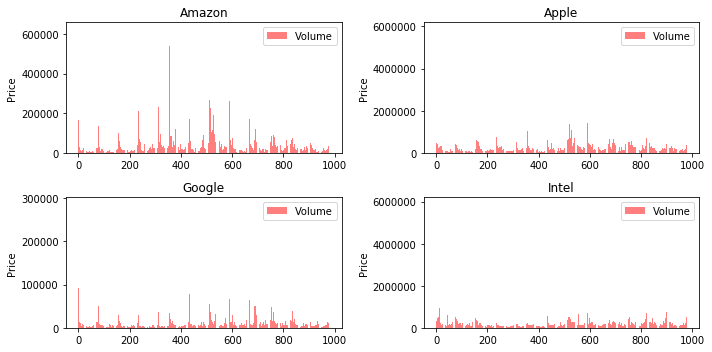

In [8]:
# set figuresize: 10 wide 5 tall
plt.figure(figsize=(10, 5))


# Amazon
plt.subplot(2, 2, 1)
plt.bar(Amazon.index,Amazon['Volume'], color='red', label='Volume', alpha=.5)
plt.ylabel('Price')
plt.title('Amazon')
plt.legend()

# Apple
plt.subplot(2, 2, 2)
plt.bar(Apple.index,Apple['Volume'], color='red', label='Volume',alpha=.5)
plt.ylabel('Price')
plt.title('Apple')
plt.legend()

# Google
plt.subplot(2, 2, 3)
plt.bar(Google.index,Google['Volume'], color='red', label='Volume',alpha=.5)
plt.ylabel('Price')
plt.title('Google')
plt.legend()

# Intel
plt.subplot(2, 2, 4)
plt.bar(Intel.index,Intel['Volume'], color='red', label='Volume', alpha=.5)
plt.ylabel('Price')
plt.title('Intel')
plt.legend()

# give more space between subplots
plt.tight_layout() 

# show the subplots
plt.show()